# Config

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statsmodels.api as sm

from scipy.integrate import quad


# Slides
## 05

In [2]:
# Definir os valores de x e y
x = np.linspace(0, 4, 100)  # 100 pontos entre 0 e 4 para x
y = np.linspace(0, 4, 100)  # 100 pontos entre 0 e 4 para y
x_grid, y_grid = np.meshgrid(x, y)  # Criar uma grade de valores para x e y

# Calcular a função f_X,Y(x,y)
z = (x_grid + y_grid) / (4 * (2 + y_grid))

# Criar a superfície
fig = go.Figure(data=[go.Surface(z=z, x=x_grid, y=y_grid, showscale=False)])

# Configurações do layout sem título e sem escala de cores
fig.update_layout(
    title='',  # Remover título
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='z',
        camera=dict(eye=dict(x=-1.5, y=1.5, z=0.5))
    ),
    # Ajustar margens para reduzir a área branca
    margin=dict(l=0, r=0, b=0, t=0),  # Limitar margens para eliminar espaço extra
    width=800,  # Ajustar a largura da imagem
    height=800  # Ajustar a altura da imagem
)

# Mostrar o gráfico
fig.show()

# Salvar a imagem sem a escala de cores e título, com margens reduzidas
# fig.write_image("grafico_sem_margem.png")


## 06

In [6]:
# Definir os valores de x e y
x = np.linspace(0, 4, 100)  # 100 pontos entre 0 e 4 para x
y = np.linspace(0, 4, 100)  # 100 pontos entre 0 e 4 para y
x_grid, y_grid = np.meshgrid(x, y)  # Criar uma grade de valores para x e y

# Calcular a função f_X,Y(x,y)
z = (x_grid + y_grid) / (4 * (2 + y_grid))

# Criar a superfície
fig = go.Figure(data=[go.Surface(z=z, x=x_grid, y=y_grid, showscale=False)])

# Criando o corte em Y = 2
y_cut = 2

# Calcular o valor de z para cada x no corte y = 2
z_cut = (x + y_cut) / (4 * (2 + y_cut))

# Ajustando o plano para estender-se em Z de 0 até 0.5
z_plane_min = 0  # valor mínimo de z no plano
z_plane_max = 0.5  # valor máximo de z no plano

# Criando uma grade para o plano no corte Y = 2, com z variando entre 0 e 0.5
X_plane, Z_plane = np.meshgrid(x, np.linspace(z_plane_min, z_plane_max, 100))

# Adicionando o plano em Y = 2 com o intervalo de z de 0 a 0.5
fig.add_trace(go.Surface(z=Z_plane, x=X_plane, y=np.full_like(X_plane, y_cut),
                         colorscale='Greys', opacity=0.5, showscale=False,
                         name='Plano Y=2'))

# Adicionando os pontos de f(x, 2) = (x + 2) / 16
fig.add_trace(go.Scatter3d(x=x, y=np.full_like(x, y_cut), z=z_cut,
                           mode='markers+lines', marker=dict(size=2, color='red'),
                           name='Pontos f(x, 2)'))

# Configurações do layout sem título e sem escala de cores
fig.update_layout(
    title='',  # Remover título
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='z',
        camera=dict(eye=dict(x=-1.5, y=1.5, z=0.5))
    ),
    # Ajustar margens para reduzir a área branca
    margin=dict(l=0, r=0, b=0, t=0),  # Limitar margens para eliminar espaço extra
    width=800,  # Ajustar a largura da imagem
    height=800  # Ajustar a altura da imagem
)

# Mostrar o gráfico
fig.show()

# Salvar a imagem sem a escala de cores e título, com margens reduzidas
# fig.write_image("grafico_sem_margem.png")


## 07

In [4]:
# Função genérica para a densidade condicional f_{(X|Y)}(x|y)
def conditional_density(x, y, params=None):
    return (x + y) / (4 * (2 + y))  # Exemplo: ajuste conforme a nova função

# Função para calcular o valor esperado de E[X|Y=y]
def expected_value_conditional(y, x_min, x_max, conditional_density):
    integrand = lambda x_val: x_val * conditional_density(x_val, y)
    expected_value, _ = quad(integrand, x_min, x_max)
    return expected_value

# Função analítica para E[X|Y=y] (se existir)
def analytical_expected_value(y_values):
    return (2 * (3 * y_values + 8)) / (3 * (y_values + 2))  # Ajuste conforme a nova função

# Função para criar e configurar a figura 3D
def create_3d_figure(x_range, y_values, conditional_density, analytical_expected_value=None, x_min=0, x_max=4):
    fig = go.Figure()

    # Adicionar gráficos para diferentes valores de Y
    for y in y_values:
        # Cálculo da função f_{(X|Y)}(x|y)
        f_xy = conditional_density(x_range, y)

        # Adiciona o traço à figura
        fig.add_trace(go.Scatter3d(
            x=x_range,
            y=[y] * len(x_range),
            z=f_xy,
            mode='lines'
            # name=f'f(X|Y={y:.2f})'
        ))

        # Calcula o valor esperado
        expected_value = expected_value_conditional(y, x_min, x_max, conditional_density)

        # Altura do valor esperado
        expected_z = conditional_density(expected_value, y)

        # Adiciona o ponto à figura
        fig.add_trace(go.Scatter3d(
            x=[expected_value],
            y=[y],
            z=[expected_z],
            mode='markers',
            marker=dict(size=3, color='blue'),
            showlegend=False)
        )

    # Se a função analítica de E[X|Y=y] estiver definida, adicionar à figura
    if analytical_expected_value is not None:
        y_continuous = np.linspace(min(y_values), max(y_values), 100)
        e_xy = analytical_expected_value(y_continuous)
        expected_z = conditional_density(e_xy, y_continuous)

        fig.add_trace(go.Scatter3d(
            x=e_xy,
            y=y_continuous,
            z=expected_z,
            mode='lines',
            line=dict(color='green', width=4)
            # name='E[X|Y=y] (analítico)'
        ))

    # Configurações do layout e da visualização 3D
    fig.update_layout(
        title='',  # Remover título
        scene=dict(
            xaxis_title='x',
            yaxis_title='y',
            zaxis_title='z',
            camera=dict(eye=dict(x=-1.5, y=1.5, z=0.5))
        ),
        # Ajustar margens para reduzir a área branca
        margin=dict(l=0, r=0, b=0, t=0),  # Limitar margens para eliminar espaço extra
        width=900,  # Ajustar a largura da imagem
        height=800  # Ajustar a altura da imagem
    )

    return fig

# Função principal para rodar o gráfico
def plot_conditional_distribution():
    x_range = np.linspace(0, 4, 100)  # Definir o intervalo de X
    y_values = np.arange(0, 4.25, 0.25)  # Definir valores de Y

    # Criar o gráfico
    fig = create_3d_figure(
        x_range,
        y_values,
        conditional_density,  # Substitua para aplicar uma função condicional diferente
        analytical_expected_value  # Definir função analítica se necessário
    )

    # Mostrar o gráfico
    fig.show()

    # Salvar a imagem sem a escala de cores e título, com margens reduzidas
    # fig.write_image("grafico_condicional_sem_margem.png")

# Executar o gráfico
plot_conditional_distribution()

## 12

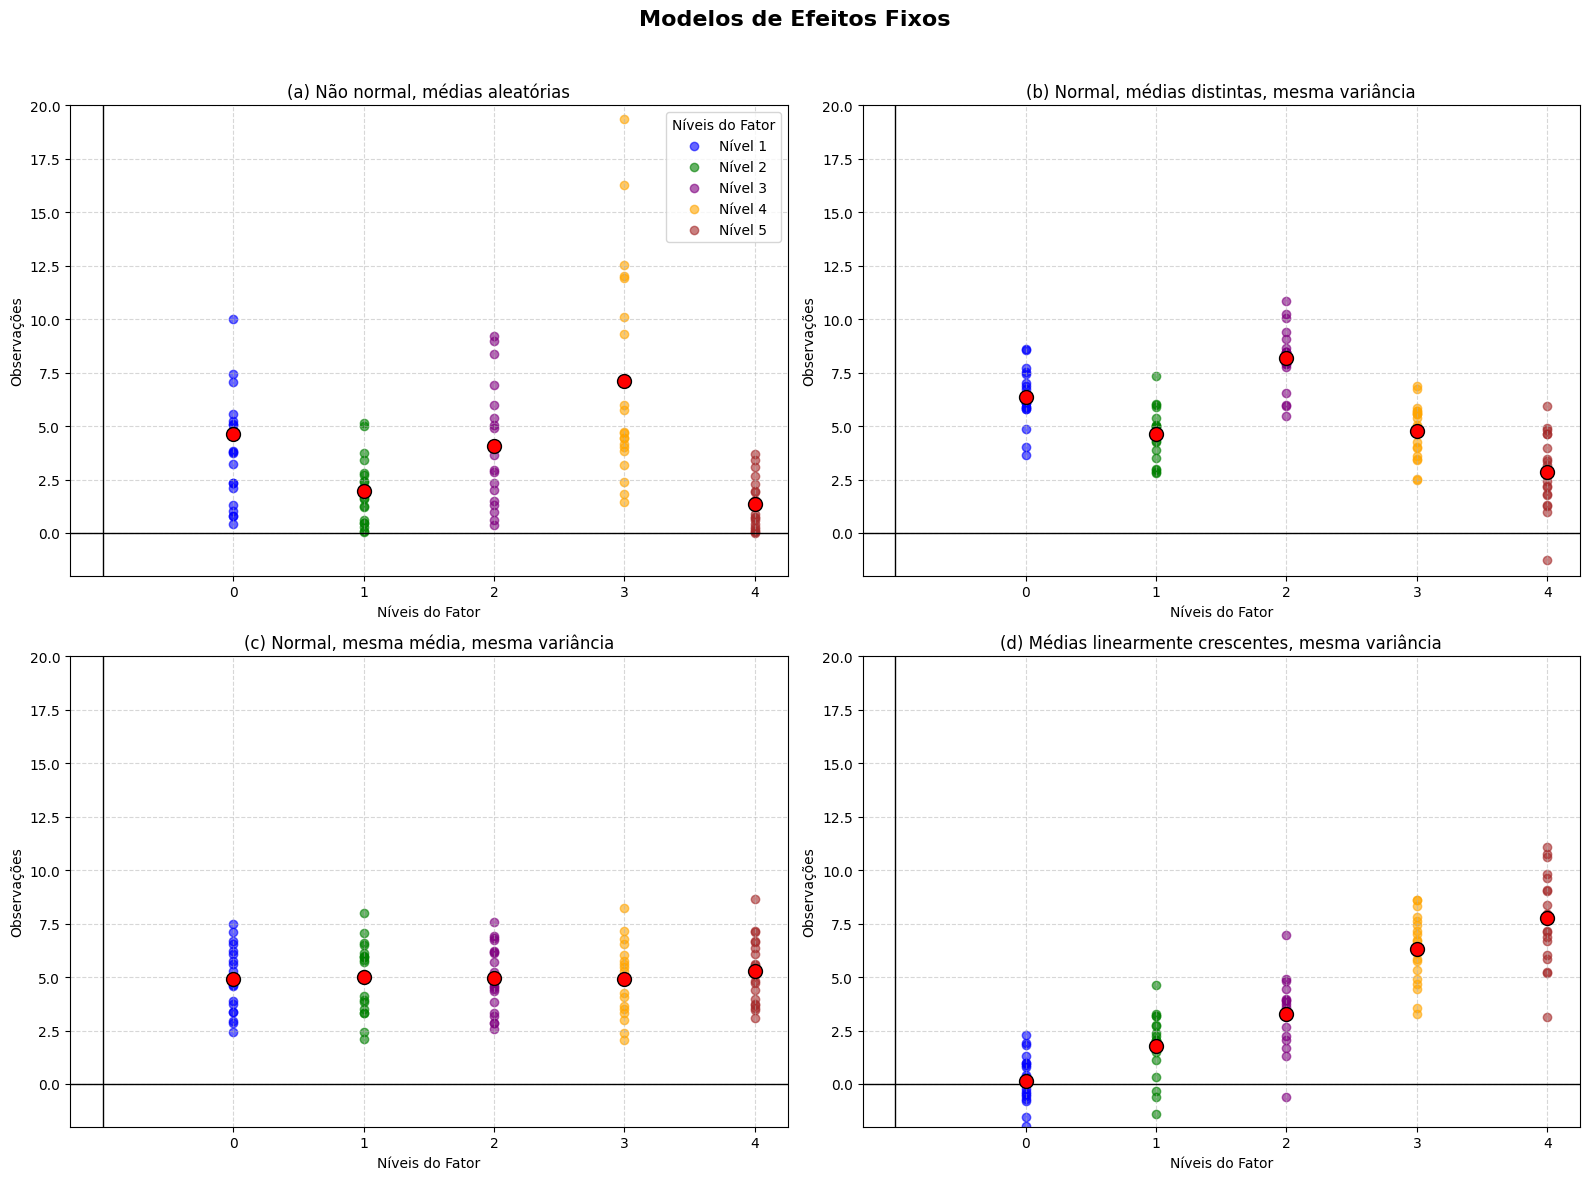

In [7]:
# Definições iniciais
niveis = 5  # Número de níveis do fator
obs_por_nivel = 20  # Número de observações por nível
cores = ['blue', 'green', 'purple', 'orange', 'brown']  # Cores para os níveis

fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Criar subplots 2x2
fig.suptitle("Modelos de Efeitos Fixos", fontsize=16, fontweight='bold')

# Gerando dados para cada quadrante
for i, ax in enumerate(axes.flat):
    X = np.repeat(np.arange(niveis), obs_por_nivel)  # Eixo X (níveis)

    if i == 0:
        # Primeiro quadrante: Distribuição não normal (Exponencial) com médias aleatórias
        Y = np.concatenate([np.random.exponential(scale=np.random.uniform(1, 10), size=obs_por_nivel) for j in range(niveis)])
        ax.set_title("(a) Não normal, médias aleatórias")

    elif i == 1:
        # Segundo quadrante: Normal com médias distintas, mesma variância
        Y = np.concatenate([np.random.normal(loc=np.random.uniform(1, 10), scale=1.5, size=obs_por_nivel) for j in range(niveis)])
        ax.set_title("(b) Normal, médias distintas, mesma variância")

    elif i == 2:
        # Terceiro quadrante: Normal com mesma média e mesma variância
        Y = np.concatenate([np.random.normal(loc=5, scale=1.5, size=obs_por_nivel) for _ in range(niveis)])
        ax.set_title("(c) Normal, mesma média, mesma variância")

    else:
        # Quarto quadrante: Médias linearmente crescentes, mesma variância
        Y = np.concatenate([np.random.normal(loc=j * 2, scale=1.5, size=obs_por_nivel) for j in range(niveis)])
        ax.set_title("(d) Médias linearmente crescentes, mesma variância")

    # Plotagem
    for j in range(niveis):
        ax.scatter(X[j * obs_por_nivel:(j + 1) * obs_por_nivel],
                   Y[j * obs_por_nivel:(j + 1) * obs_por_nivel],
                   color=cores[j], alpha=0.6, label=f"Nível {j+1}" if i == 0 else "")

        # Média do fator (ponto destacado)
        media_fator = np.mean(Y[j * obs_por_nivel:(j + 1) * obs_por_nivel])
        ax.scatter(j, media_fator, color='red', edgecolors='black', s=100, zorder=3)

    ax.axhline(y=0, color='black', linewidth=1)
    ax.axvline(x=-1, color='black', linewidth=1)
    ax.set_xticks(range(niveis))
    ax.set_xlabel("Níveis do Fator")
    ax.set_ylabel("Observações")
    ax.grid(True, linestyle="--", alpha=0.5)

    # Ajustando os limites do eixo y
    ax.set_ylim(-2, 20)

# Adicionar legenda apenas no primeiro quadrante
axes[0, 0].legend(title="Níveis do Fator")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta espaçamento para o título
plt.show()

## 18

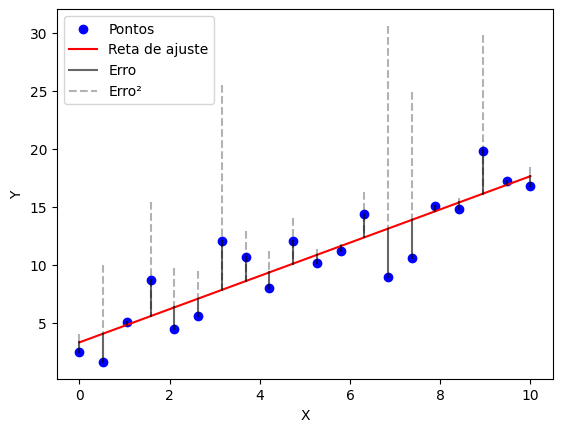

In [8]:
# Gerar dados aleatórios
np.random.seed(42)
x = np.linspace(0, 10, 20)
y = 2 * x + 1 + np.random.normal(scale=3, size=len(x))

# Ajuste da reta por mínimos quadrados
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

# Valores ajustados da reta
y_pred = m * x + c

# Plotando os dados e a reta de ajuste
plt.scatter(x, y, label='Pontos', color='blue')
plt.plot(x, y_pred, 'r-', label='Reta de ajuste')

# Adicionando linhas de erro
for i in range(len(x)):
    erro = abs(y[i] - y_pred[i])
    erro2 = erro**2
    plt.plot([x[i], x[i]], [y_pred[i], y[i]], 'k-', alpha=0.6, label='Erro' if i == 0 else "")  # Traço sólido (erro)
    plt.plot([x[i], x[i]], [y_pred[i] + erro2, y_pred[i]], 'k--', alpha=0.3, label='Erro²' if i == 0 else "")  # Traço pontilhado (erro²)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## 21

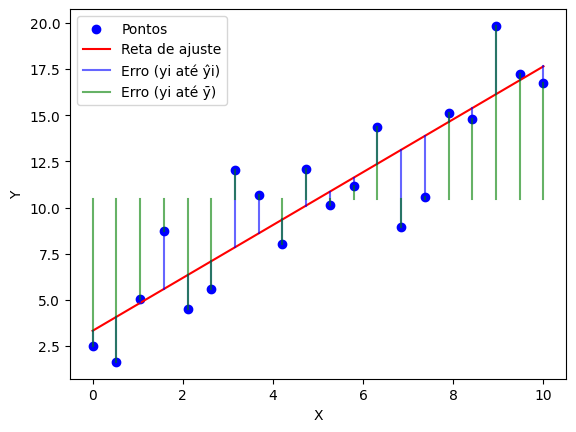

In [9]:
# Gerar dados aleatórios
np.random.seed(42)
x = np.linspace(0, 10, 20)
y = 2 * x + 1 + np.random.normal(scale=3, size=len(x))

# Ajuste da reta por mínimos quadrados
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

# Valores ajustados da reta
y_pred = m * x + c

# Média amostral de y
y_bar = np.mean(y)

# Plotando os dados e a reta de ajuste
plt.scatter(x, y, label='Pontos', color='blue')
plt.plot(x, y_pred, 'r-', label='Reta de ajuste')

# Adicionando as linhas de erro
for i in range(len(x)):
    # Traço azul de yi até y_pred (reta ajustada)
    plt.plot([x[i], x[i]], [y[i], y_pred[i]], 'b-', alpha=0.6, label='Erro (yi até ŷi)' if i == 0 else "")

    # Traço verde de yi até y_bar (média amostral)
    plt.plot([x[i], x[i]], [y[i], y_bar], 'g-', alpha=0.6, label='Erro (yi até ȳ)' if i == 0 else "")

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## 30

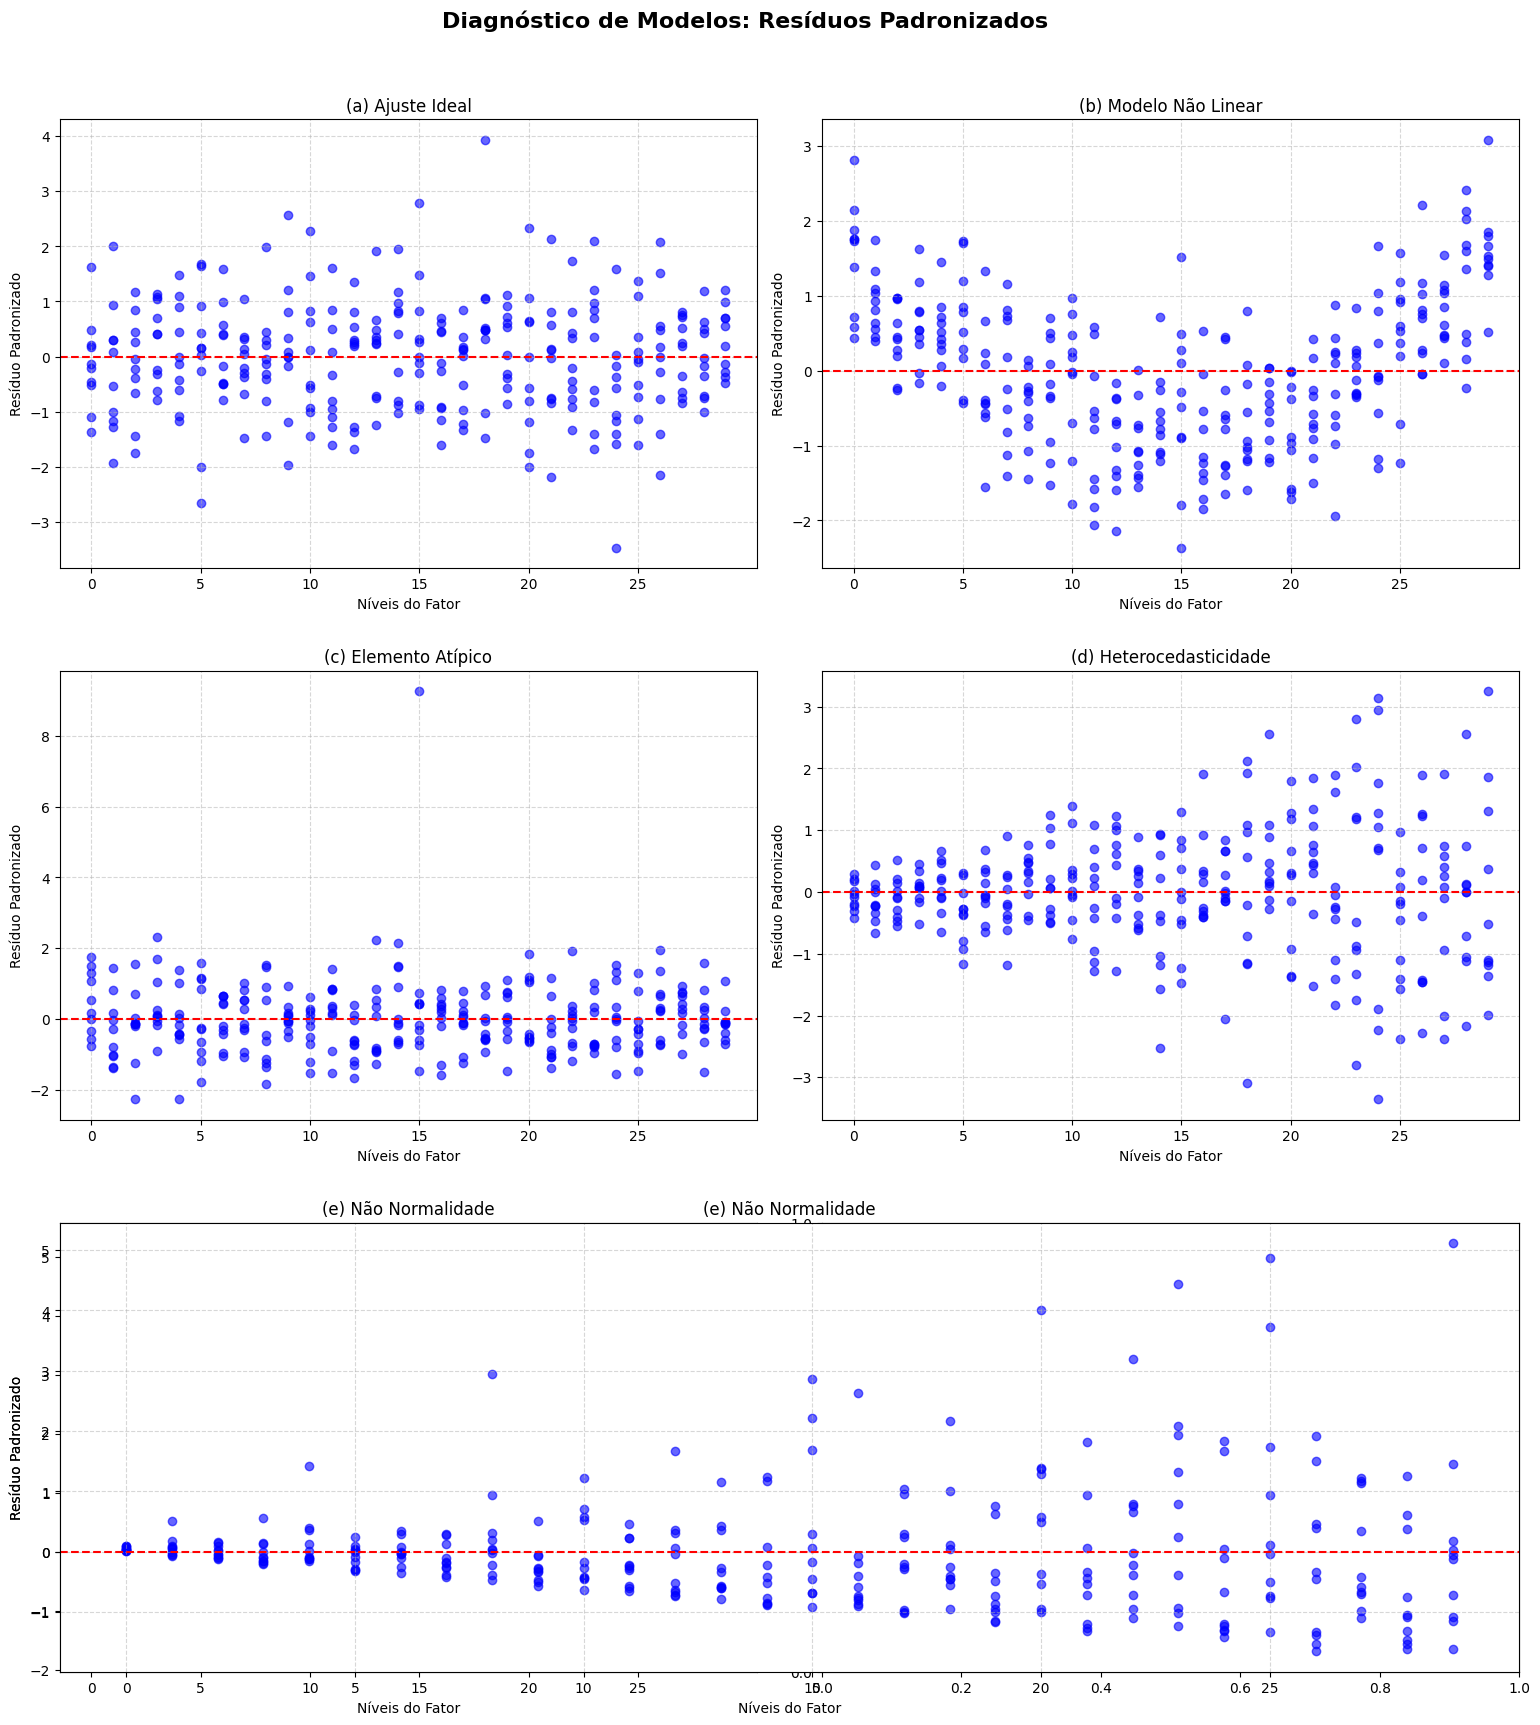

In [11]:
# Definições iniciais
niveis = 30  # Número de níveis do fator
obs_por_nivel = 10  # Número de observações por nível
cores = plt.cm.viridis(np.linspace(0, 1, niveis))  # Gerando cores distintas

fig, axes = plt.subplots(3, 2, figsize=(16, 18))  # Criar subplots 3x2
fig.suptitle("Diagnóstico de Modelos: Resíduos Padronizados", fontsize=16, fontweight='bold')
cenarios = ["(a) Ajuste Ideal", "(b) Modelo Não Linear", "(c) Elemento Atípico", "(d) Heterocedasticidade", "(e) Não Normalidade"]

for i, ax in enumerate(axes.flat[:-1]):  # Deixar o último gráfico centralizado
    X = np.repeat(np.arange(niveis), obs_por_nivel)  # Fatores

    if i == 0:
        # (a) Ajuste ideal: Normal, mesma variância
        Y = np.concatenate([np.random.normal(loc=j, scale=1.5, size=obs_por_nivel) for j in range(niveis)])
    elif i == 1:
        # (b) Modelo não linear: Parabólico
        Y = np.concatenate([np.random.normal(loc=j**2 / 50, scale=1.5, size=obs_por_nivel) for j in range(niveis)])
    elif i == 2:
        # (c) Elemento atípico: Um outlier em um nível
        Y = np.concatenate([np.random.normal(loc=j, scale=1.5, size=obs_por_nivel) for j in range(niveis)])
        Y[niveis * obs_por_nivel // 2] += 15  # Outlier
    elif i == 3:
        # (d) Heterocedasticidade: Variância crescente
        Y = np.concatenate([np.random.normal(loc=j, scale=0.5 + j / 10, size=obs_por_nivel) for j in range(niveis)])
    elif i == 4:
        # (e) Não normalidade: Distribuição exponencial
        Y = np.concatenate([np.random.exponential(scale=j + 1, size=obs_por_nivel) for j in range(niveis)])

    # Ajuste da reta
    X_model = sm.add_constant(X)
    modelo = sm.OLS(Y, X_model).fit()
    Y_pred = modelo.predict(X_model)
    residuos = Y - Y_pred
    residuos_padronizados = residuos / np.std(residuos)

    ax.set_title(cenarios[i])
    ax.scatter(X, residuos_padronizados, color='blue', alpha=0.6)
    ax.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
    ax.set_xlabel("Níveis do Fator")
    ax.set_ylabel("Resíduo Padronizado")
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.set_xticks(range(0, niveis, 5))

# Último gráfico centralizado na parte inferior
ax = fig.add_subplot(3, 1, 3)
ax.set_title(cenarios[-1])
X = np.repeat(np.arange(niveis), obs_por_nivel)
Y = np.concatenate([np.random.exponential(scale=j + 1, size=obs_por_nivel) for j in range(niveis)])
X_model = sm.add_constant(X)
modelo = sm.OLS(Y, X_model).fit()
Y_pred = modelo.predict(X_model)
residuos = Y - Y_pred
residuos_padronizados = residuos / np.std(residuos)
ax.scatter(X, residuos_padronizados, color='blue', alpha=0.6)
ax.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
ax.set_xlabel("Níveis do Fator")
ax.set_ylabel("Resíduo Padronizado")
ax.grid(True, linestyle="--", alpha=0.5)
ax.set_xticks(range(0, niveis, 5))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()